# 多元线性回归实战教程 - 多因素幸福指数预测

## 🎯 学习目标
- 理解多元线性回归与单变量线性回归的区别
- 学会处理多个特征变量的机器学习问题
- 掌握3D可视化技术展示多维数据关系
- 理解特征之间的相互作用对预测结果的影响
- 学会评估多元回归模型的性能

---

## 📚 理论回顾

### 🔄 从单变量到多变量
在前面的教程中，我们学习了单变量线性回归：
```
幸福指数 = θ₀ + θ₁ × 经济指标
```

现在我们要学习多元线性回归，使用多个特征来预测：
```
幸福指数 = θ₀ + θ₁ × 经济指标 + θ₂ × 自由度 + ... + θₙ × 特征ₙ
```

### 🌟 多元回归的优势
- **更全面**：考虑多个影响因素，更接近现实
- **更准确**：通常能获得更好的预测精度
- **更深入**：能分析各因素的相对重要性

### ⚠️ 需要注意的问题
- **多重共线性**：特征之间可能存在相关性
- **维度诅咒**：特征过多可能导致过拟合
- **解释复杂**：模型变得更难理解

In [3]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 110.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.4/373.4 KB 78.2 MB/s eta 0:00:00


In [4]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
import sys
sys.path.append('..')
from linear_regression import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# 设置plotly离线模式
pyo.init_notebook_mode(connected=True)

print("✅ 库导入成功！")
print("📊 准备开始多元线性回归之旅！")

✅ 库导入成功！
📊 准备开始多元线性回归之旅！


## 📊 第一部分：数据加载与特征选择

在这个教程中，我们将使用两个特征来预测幸福指数：
- **经济指标** (Economy GDP per Capita)：反映经济发展水平
- **自由度** (Freedom)：反映社会自由程度

这样我们就能看到经济和自由度如何共同影响一个国家的幸福水平！

In [5]:
# 加载数据
data = pd.read_csv('../data/world-happiness-report-2017.csv')

print("🌍 世界幸福指数数据集概览：")
print(f"数据形状: {data.shape}")
print(f"\n📋 数据列名:")
for i, col in enumerate(data.columns, 1):
    print(f"{i:2d}. {col}")

# 定义我们要使用的特征
input_param_name_1 = 'Economy..GDP.per.Capita.'  # 经济指标
input_param_name_2 = 'Freedom'                    # 自由度
output_param_name = 'Happiness.Score'             # 幸福指数

print(f"\n🎯 选择的特征：")
print(f"  特征1: {input_param_name_1} (经济指标)")
print(f"  特征2: {input_param_name_2} (自由度)")
print(f"  目标变量: {output_param_name} (幸福指数)")

🌍 世界幸福指数数据集概览：
数据形状: (155, 12)

📋 数据列名:
 1. Country
 2. Happiness.Rank
 3. Happiness.Score
 4. Whisker.high
 5. Whisker.low
 6. Economy..GDP.per.Capita.
 7. Family
 8. Health..Life.Expectancy.
 9. Freedom
10. Generosity
11. Trust..Government.Corruption.
12. Dystopia.Residual

🎯 选择的特征：
  特征1: Economy..GDP.per.Capita. (经济指标)
  特征2: Freedom (自由度)
  目标变量: Happiness.Score (幸福指数)


In [6]:
# 查看选定特征的统计信息
selected_features = [input_param_name_1, input_param_name_2, output_param_name]
print("📈 选定特征的统计信息：")
print(data[selected_features].describe())

# 检查缺失值
print("\n🔍 缺失值检查：")
missing_values = data[selected_features].isnull().sum()
for feature, missing in missing_values.items():
    print(f"  {feature}: {missing} 个缺失值")

# 计算特征之间的相关性
print("\n🔗 特征相关性矩阵：")
correlation_matrix = data[selected_features].corr()
print(correlation_matrix.round(4))

📈 选定特征的统计信息：
       Economy..GDP.per.Capita.     Freedom  Happiness.Score
count                155.000000  155.000000       155.000000
mean                   0.984718    0.408786         5.354019
std                    0.420793    0.149997         1.131230
min                    0.000000    0.000000         2.693000
25%                    0.663371    0.303677         4.505500
50%                    1.064578    0.437454         5.279000
75%                    1.318027    0.516561         6.101500
max                    1.870766    0.658249         7.537000

🔍 缺失值检查：
  Economy..GDP.per.Capita.: 0 个缺失值
  Freedom: 0 个缺失值
  Happiness.Score: 0 个缺失值

🔗 特征相关性矩阵：
                          Economy..GDP.per.Capita.  Freedom  Happiness.Score
Economy..GDP.per.Capita.                    1.0000   0.3699           0.8125
Freedom                                     0.3699   1.0000           0.5701
Happiness.Score                             0.8125   0.5701           1.0000


## 🎲 第二部分：数据预处理与分割

In [7]:
# 数据分割：80%训练，20%测试
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

print(f"📊 数据分割结果：")
print(f"训练集大小: {len(train_data)} 个样本")
print(f"测试集大小: {len(test_data)} 个样本")

# 提取特征和目标变量
# 注意：这次我们使用两个特征！
x_train = train_data[[input_param_name_1, input_param_name_2]].values
y_train = train_data[[output_param_name]].values

x_test = test_data[[input_param_name_1, input_param_name_2]].values
y_test = test_data[[output_param_name]].values

print(f"\n📏 数据维度：")
print(f"x_train形状: {x_train.shape} (样本数, 特征数)")
print(f"y_train形状: {y_train.shape}")
print(f"x_test形状: {x_test.shape}")
print(f"y_test形状: {y_test.shape}")

print(f"\n💡 重要观察：")
print(f"  现在每个样本有 {x_train.shape[1]} 个特征（之前只有1个）")
print(f"  这意味着我们的模型将学习一个平面而不是直线！")

📊 数据分割结果：
训练集大小: 124 个样本
测试集大小: 31 个样本

📏 数据维度：
x_train形状: (124, 2) (样本数, 特征数)
y_train形状: (124, 1)
x_test形状: (31, 2)
y_test形状: (31, 1)

💡 重要观察：
  现在每个样本有 2 个特征（之前只有1个）
  这意味着我们的模型将学习一个平面而不是直线！


## 🎨 第三部分：3D数据可视化

由于我们现在有两个输入特征和一个输出，我们可以用3D图来可视化数据！
- X轴：经济指标
- Y轴：自由度
- Z轴：幸福指数

In [8]:
# 创建3D散点图
def create_3d_scatter():
    # 训练数据点
    plot_training_trace = go.Scatter3d(
        x=x_train[:, 0].flatten(),
        y=x_train[:, 1].flatten(),
        z=y_train.flatten(),
        name='训练数据',
        mode='markers',
        marker=dict(
            size=8,
            color='blue',
            opacity=0.8,
            line=dict(
                color='darkblue',
                width=1
            )
        )
    )
    
    # 测试数据点
    plot_test_trace = go.Scatter3d(
        x=x_test[:, 0].flatten(),
        y=x_test[:, 1].flatten(),
        z=y_test.flatten(),
        name='测试数据',
        mode='markers',
        marker=dict(
            size=10,
            color='red',
            opacity=0.9,
            line=dict(
                color='darkred',
                width=2
            )
        )
    )
    
    # 图表布局
    plot_layout = go.Layout(
        title='🌍 多元线性回归：经济指标 vs 自由度 vs 幸福指数',
        scene=dict(
            xaxis=dict(title='经济指标 (GDP per Capita)'),
            yaxis=dict(title='自由度 (Freedom)'),
            zaxis=dict(title='幸福指数 (Happiness Score)')
        ),
        width=800,
        height=600
    )
    
    plot_data = [plot_training_trace, plot_test_trace]
    fig = go.Figure(data=plot_data, layout=plot_layout)
    
    return fig

# 显示3D图
fig_3d = create_3d_scatter()
pyo.iplot(fig_3d)

print("🎨 3D可视化说明：")
print("  • 蓝色点：训练数据")
print("  • 红色点：测试数据")
print("  • 可以旋转图表来观察不同角度的数据分布")
print("  • 注意观察数据点是否呈现某种规律性分布")

🎨 3D可视化说明：
  • 蓝色点：训练数据
  • 红色点：测试数据
  • 可以旋转图表来观察不同角度的数据分布
  • 注意观察数据点是否呈现某种规律性分布


## 🤖 第四部分：多元线性回归模型训练

现在我们要训练一个多元线性回归模型。与单变量不同，这次我们的模型将学习一个**平面**而不是直线来拟合数据！

In [9]:
# 设置训练参数
num_iterations = 500
learning_rate = 0.01
polynomial_degree = 0  # 不使用多项式特征
sinusoid_degree = 0    # 不使用正弦特征

print("🚀 开始训练多元线性回归模型...")
print(f"训练参数设置：")
print(f"  • 迭代次数: {num_iterations}")
print(f"  • 学习率: {learning_rate}")
print(f"  • 特征数量: {x_train.shape[1]}")
print(f"  • 训练样本: {x_train.shape[0]}")

# 创建并训练模型
linear_regression = LinearRegression(
    x_train, 
    y_train, 
    polynomial_degree, 
    sinusoid_degree
)

# 开始训练
(theta, cost_history) = linear_regression.train(
    learning_rate,
    num_iterations
)

print(f"\n✅ 训练完成！")
print(f"初始损失: {cost_history[0]:.6f}")
print(f"最终损失: {cost_history[-1]:.6f}")
print(f"损失降低: {((cost_history[0] - cost_history[-1]) / cost_history[0] * 100):.2f}%")

# 显示学到的参数
print(f"\n🧠 模型学到的参数：")
print(f"  θ₀ (截距): {theta[0][0]:.4f}")
print(f"  θ₁ (经济系数): {theta[1][0]:.4f}")
print(f"  θ₂ (自由度系数): {theta[2][0]:.4f}")

print(f"\n📐 多元线性回归方程：")
print(f"幸福指数 = {theta[0][0]:.4f} + {theta[1][0]:.4f} × 经济指标 + {theta[2][0]:.4f} × 自由度")

🚀 开始训练多元线性回归模型...
训练参数设置：
  • 迭代次数: 500
  • 学习率: 0.01
  • 特征数量: 2
  • 训练样本: 124

✅ 训练完成！
初始损失: 14.941046
最终损失: 0.163437
损失降低: 98.91%

🧠 模型学到的参数：
  θ₀ (截距): 5.3690
  θ₁ (经济系数): 0.7763
  θ₂ (自由度系数): 0.3491

📐 多元线性回归方程：
幸福指数 = 5.3690 + 0.7763 × 经济指标 + 0.3491 × 自由度


## 📈 第五部分：训练过程可视化

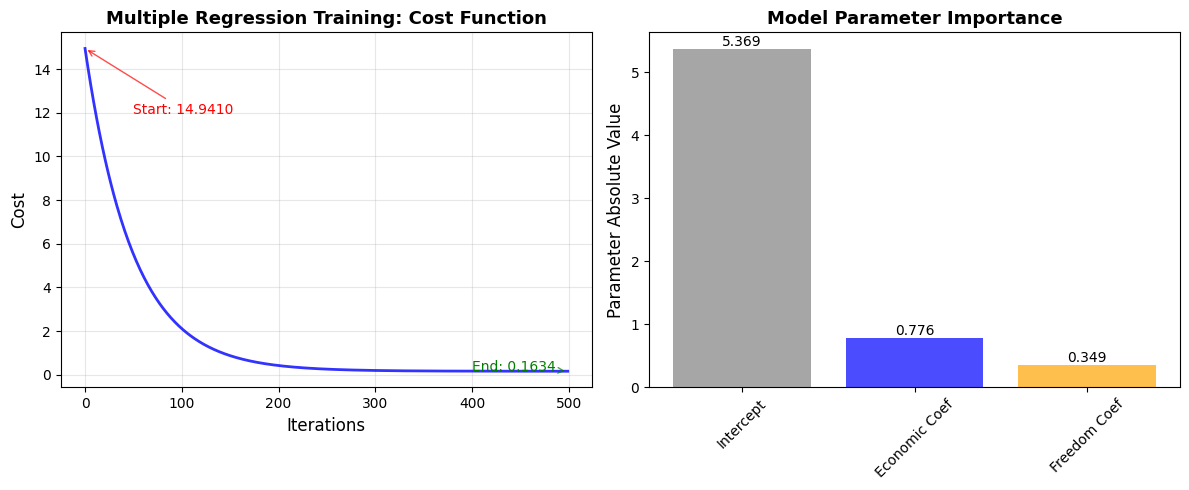

📊 图表解读：
  • 左图：损失函数持续下降，说明模型在不断学习
  • 右图：显示各参数的相对重要性
  • 经济指标对幸福指数的影响更大


In [11]:
# 可视化训练过程
plt.figure(figsize=(12, 5))

# 左图：损失函数变化
plt.subplot(1, 2, 1)
plt.plot(range(num_iterations), cost_history, 'b-', linewidth=2, alpha=0.8)
plt.xlabel('Iterations', fontsize=12)
plt.ylabel('Cost', fontsize=12)
plt.title('Multiple Regression Training: Cost Function', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)

# 添加关键点标注
plt.annotate(f'Start: {cost_history[0]:.4f}', 
             xy=(0, cost_history[0]), xytext=(50, cost_history[0]*0.8),
             arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
             fontsize=10, color='red')
plt.annotate(f'End: {cost_history[-1]:.4f}', 
             xy=(num_iterations-1, cost_history[-1]), xytext=(num_iterations-100, cost_history[-1]*1.2),
             arrowprops=dict(arrowstyle='->', color='green', alpha=0.7),
             fontsize=10, color='green')

# 右图：参数变化（如果我们记录了参数历史）
plt.subplot(1, 2, 2)
# 创建一个简单的参数重要性图
params = ['Intercept', 'Economic Coef', 'Freedom Coef']
values = [abs(theta[0][0]), abs(theta[1][0]), abs(theta[2][0])]
colors = ['gray', 'blue', 'orange']

bars = plt.bar(params, values, color=colors, alpha=0.7)
plt.ylabel('Parameter Absolute Value', fontsize=12)
plt.title('Model Parameter Importance', fontsize=13, fontweight='bold')
plt.xticks(rotation=45)

# 在柱状图上添加数值标签
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{value:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


print("📊 图表解读：")
print("  • 左图：损失函数持续下降，说明模型在不断学习")
print("  • 右图：显示各参数的相对重要性")
if abs(theta[1][0]) > abs(theta[2][0]):
    print("  • 经济指标对幸福指数的影响更大")
else:
    print("  • 自由度对幸福指数的影响更大")

## 🎯 第六部分：模型预测与3D平面可视化

现在让我们看看模型学到的预测平面！在3D空间中，多元线性回归会拟合一个平面来最好地描述数据。

In [12]:
# 生成预测平面的数据点
predictions_num = 15  # 每个维度的点数

# 获取特征的范围
x_min, x_max = x_train[:, 0].min(), x_train[:, 0].max()
y_min, y_max = x_train[:, 1].min(), x_train[:, 1].max()

print(f"📏 特征范围：")
print(f"  经济指标范围: [{x_min:.3f}, {x_max:.3f}]")
print(f"  自由度范围: [{y_min:.3f}, {y_max:.3f}]")

# 创建网格点
x_axis = np.linspace(x_min, x_max, predictions_num)
y_axis = np.linspace(y_min, y_max, predictions_num)

# 生成所有组合的预测点
x_predictions = []
y_predictions = []

for x_value in x_axis:
    for y_value in y_axis:
        x_predictions.append(x_value)
        y_predictions.append(y_value)

# 转换为numpy数组
x_predictions = np.array(x_predictions).reshape(-1, 1)
y_predictions = np.array(y_predictions).reshape(-1, 1)

# 组合特征进行预测
prediction_features = np.hstack((x_predictions, y_predictions))
z_predictions = linear_regression.predict(prediction_features)

print(f"\n🔮 生成了 {len(z_predictions)} 个预测点来构建预测平面")

📏 特征范围：
  经济指标范围: [0.092, 1.871]
  自由度范围: [0.000, 0.658]

🔮 生成了 225 个预测点来构建预测平面


In [13]:
# 创建包含预测平面的3D图
def create_3d_with_predictions():
    # 原始训练数据
    plot_training_trace = go.Scatter3d(
        x=x_train[:, 0].flatten(),
        y=x_train[:, 1].flatten(),
        z=y_train.flatten(),
        name='训练数据',
        mode='markers',
        marker=dict(
            size=8,
            color='blue',
            opacity=0.8
        )
    )
    
    # 测试数据
    plot_test_trace = go.Scatter3d(
        x=x_test[:, 0].flatten(),
        y=x_test[:, 1].flatten(),
        z=y_test.flatten(),
        name='测试数据',
        mode='markers',
        marker=dict(
            size=10,
            color='red',
            opacity=0.9
        )
    )
    
    # 预测平面
    plot_predictions_trace = go.Scatter3d(
        x=x_predictions.flatten(),
        y=y_predictions.flatten(),
        z=z_predictions.flatten(),
        name='预测平面',
        mode='markers',
        marker=dict(
            size=3,
            color='green',
            opacity=0.6
        )
    )
    
    # 图表布局
    plot_layout = go.Layout(
        title='🎯 多元线性回归：数据点与预测平面',
        scene=dict(
            xaxis=dict(title='经济指标 (GDP per Capita)'),
            yaxis=dict(title='自由度 (Freedom)'),
            zaxis=dict(title='幸福指数 (Happiness Score)')
        ),
        width=900,
        height=700
    )
    
    plot_data = [plot_training_trace, plot_test_trace, plot_predictions_trace]
    fig = go.Figure(data=plot_data, layout=plot_layout)
    
    return fig

# 显示带预测平面的3D图
fig_with_plane = create_3d_with_predictions()
pyo.iplot(fig_with_plane)

print("🎨 3D预测平面可视化说明：")
print("  • 蓝色点：训练数据")
print("  • 红色点：测试数据")
print("  • 绿色点：构成预测平面的点")
print("  • 绿色点形成的平面就是我们模型学到的预测平面")
print("  • 理想情况下，所有数据点都应该接近这个平面")

🎨 3D预测平面可视化说明：
  • 蓝色点：训练数据
  • 红色点：测试数据
  • 绿色点：构成预测平面的点
  • 绿色点形成的平面就是我们模型学到的预测平面
  • 理想情况下，所有数据点都应该接近这个平面


## 📊 第七部分：模型性能评估

In [14]:
# 在测试集上进行预测
test_predictions = linear_regression.predict(x_test)

# 计算各种评估指标
def calculate_metrics(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    
    # 计算R²（决定系数）
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    
    return mse, rmse, mae, r2

mse, rmse, mae, r2 = calculate_metrics(y_test, test_predictions)

print("🎯 多元线性回归模型在测试集上的表现：")
print("="*50)
print(f"  均方误差 (MSE): {mse:.4f}")
print(f"  均方根误差 (RMSE): {rmse:.4f}")
print(f"  平均绝对误差 (MAE): {mae:.4f}")
print(f"  决定系数 (R²): {r2:.4f}")

print(f"\n📊 性能解读：")
print(f"  • R² = {r2:.4f} 意味着模型能解释 {r2*100:.1f}% 的数据变异")
print(f"  • 平均预测误差约为 {mae:.3f} 个幸福指数单位")
print(f"  • RMSE = {rmse:.3f} 表示预测的标准偏差")

# 与单变量回归比较（如果有的话）
print(f"\n💡 多元回归的优势：")
print(f"  • 考虑了多个影响因素，更全面")
print(f"  • 通常比单变量回归有更好的预测精度")
print(f"  • 能分析各因素的相对重要性")

🎯 多元线性回归模型在测试集上的表现：
  均方误差 (MSE): 0.3484
  均方根误差 (RMSE): 0.5902
  平均绝对误差 (MAE): 0.4874
  决定系数 (R²): 0.7063

📊 性能解读：
  • R² = 0.7063 意味着模型能解释 70.6% 的数据变异
  • 平均预测误差约为 0.487 个幸福指数单位
  • RMSE = 0.590 表示预测的标准偏差

💡 多元回归的优势：
  • 考虑了多个影响因素，更全面
  • 通常比单变量回归有更好的预测精度
  • 能分析各因素的相对重要性


## 🔍 第八部分：模型参数深度解析

In [15]:
# 详细分析模型参数
intercept = theta[0][0]  # 截距
coef_economy = theta[1][0]  # 经济系数
coef_freedom = theta[2][0]  # 自由度系数

print("🧠 多元线性回归模型深度解析：")
print("="*60)
print(f"📐 完整回归方程：")
print(f"幸福指数 = {intercept:.4f} + {coef_economy:.4f} × 经济指标 + {coef_freedom:.4f} × 自由度")
print()

print(f"🔍 参数详细含义：")
print(f"  • 截距 (θ₀) = {intercept:.4f}")
print(f"    含义：当经济指标和自由度都为0时的基础幸福指数")
print()
print(f"  • 经济系数 (θ₁) = {coef_economy:.4f}")
print(f"    含义：在自由度不变的情况下，经济指标每增加1个单位，")
print(f"          幸福指数平均增加 {coef_economy:.4f} 个单位")
print()
print(f"  • 自由度系数 (θ₂) = {coef_freedom:.4f}")
print(f"    含义：在经济指标不变的情况下，自由度每增加1个单位，")
print(f"          幸福指数平均增加 {coef_freedom:.4f} 个单位")

print(f"\n⚖️ 因素重要性比较：")
if abs(coef_economy) > abs(coef_freedom):
    ratio = abs(coef_economy) / abs(coef_freedom)
    print(f"  • 经济指标的影响力更大，约是自由度的 {ratio:.2f} 倍")
    print(f"  • 这表明经济发展对幸福感的影响更为显著")
elif abs(coef_freedom) > abs(coef_economy):
    ratio = abs(coef_freedom) / abs(coef_economy)
    print(f"  • 自由度的影响力更大，约是经济指标的 {ratio:.2f} 倍")
    print(f"  • 这表明社会自由对幸福感的影响更为显著")
else:
    print(f"  • 经济指标和自由度的影响力相当")

print(f"\n🌍 政策启示：")
if coef_economy > 0 and coef_freedom > 0:
    print(f"  • 经济发展和社会自由都对幸福感有正面影响")
    print(f"  • 政策制定应该平衡经济发展和社会自由")
    print(f"  • 单纯追求经济增长而忽视自由度可能不是最优策略")

🧠 多元线性回归模型深度解析：
📐 完整回归方程：
幸福指数 = 5.3690 + 0.7763 × 经济指标 + 0.3491 × 自由度

🔍 参数详细含义：
  • 截距 (θ₀) = 5.3690
    含义：当经济指标和自由度都为0时的基础幸福指数

  • 经济系数 (θ₁) = 0.7763
    含义：在自由度不变的情况下，经济指标每增加1个单位，
          幸福指数平均增加 0.7763 个单位

  • 自由度系数 (θ₂) = 0.3491
    含义：在经济指标不变的情况下，自由度每增加1个单位，
          幸福指数平均增加 0.3491 个单位

⚖️ 因素重要性比较：
  • 经济指标的影响力更大，约是自由度的 2.22 倍
  • 这表明经济发展对幸福感的影响更为显著

🌍 政策启示：
  • 经济发展和社会自由都对幸福感有正面影响
  • 政策制定应该平衡经济发展和社会自由
  • 单纯追求经济增长而忽视自由度可能不是最优策略


## 🔮 第九部分：实际预测示例

In [16]:
# 创建一些有趣的预测场景
print("🔮 多元线性回归预测示例：")
print("="*50)

# 定义一些假设的国家场景
scenarios = [
    {"name": "高经济高自由", "economy": 1.4, "freedom": 0.6},
    {"name": "高经济低自由", "economy": 1.4, "freedom": 0.2},
    {"name": "低经济高自由", "economy": 0.3, "freedom": 0.6},
    {"name": "低经济低自由", "economy": 0.3, "freedom": 0.2},
    {"name": "中等经济中等自由", "economy": 0.8, "freedom": 0.4},
]

print(f"{'场景':<12} {'经济指标':<8} {'自由度':<8} {'预测幸福指数':<12} {'解读':<20}")
print("-" * 70)

for scenario in scenarios:
    # 进行预测
    features = np.array([[scenario['economy'], scenario['freedom']]])
    prediction = linear_regression.predict(features)[0][0]
    
    # 生成解读
    if prediction > 6.5:
        interpretation = "很幸福 😊"
    elif prediction > 5.5:
        interpretation = "比较幸福 🙂"
    elif prediction > 4.5:
        interpretation = "一般幸福 😐"
    else:
        interpretation = "不太幸福 😔"
    
    print(f"{scenario['name']:<12} {scenario['economy']:<8.1f} {scenario['freedom']:<8.1f} {prediction:<12.3f} {interpretation:<20}")

print(f"\n💡 观察与思考：")
print(f"  • 比较不同场景的预测结果")
print(f"  • 思考经济和自由度如何共同影响幸福感")
print(f"  • 哪种组合能带来最高的幸福指数？")

🔮 多元线性回归预测示例：
场景           经济指标     自由度      预测幸福指数       解读                  
----------------------------------------------------------------------
高经济高自由       1.4      0.6      6.665        很幸福 😊               
高经济低自由       1.4      0.2      6.526        很幸福 😊               
低经济高自由       0.3      0.6      5.811        比较幸福 🙂              
低经济低自由       0.3      0.2      5.672        比较幸福 🙂              
中等经济中等自由     0.8      0.4      6.130        比较幸福 🙂              

💡 观察与思考：
  • 比较不同场景的预测结果
  • 思考经济和自由度如何共同影响幸福感
  • 哪种组合能带来最高的幸福指数？


## 📈 第十部分：预测效果详细分析

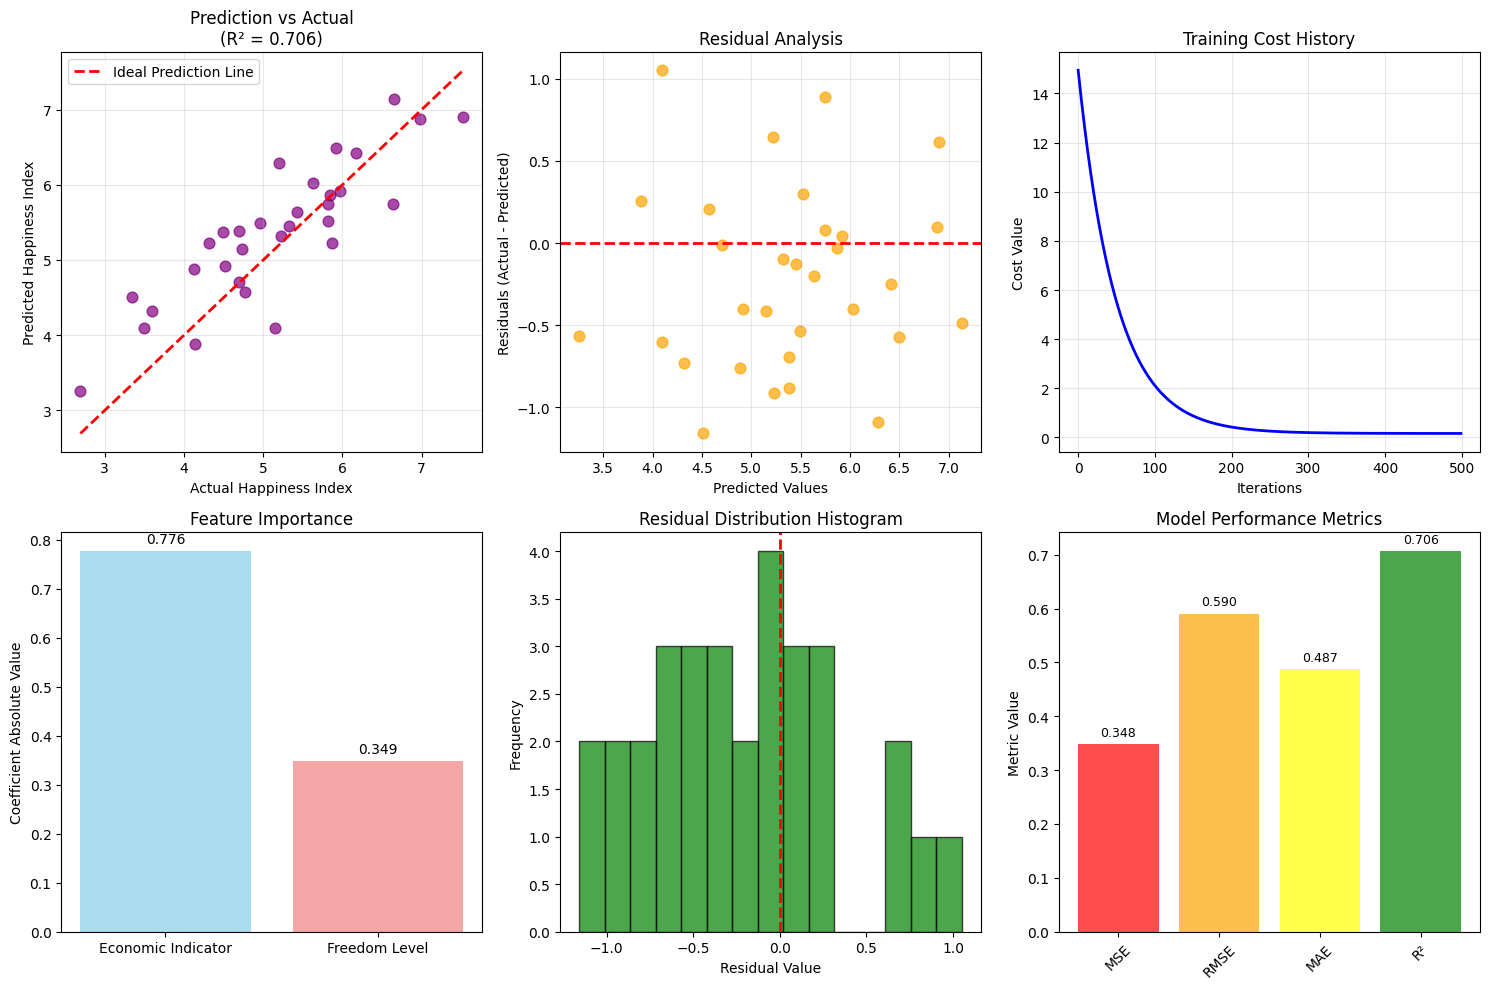

📊 综合分析图表解读：
  • 左上：预测vs实际，点越接近红线说明预测越准确
  • 中上：残差分析，残差应该随机分布在0附近
  • 右上：训练过程，损失持续下降说明模型在学习
  • 左下：特征重要性，显示哪个特征影响更大
  • 中下：残差分布，应该接近正态分布
  • 右下：性能指标汇总，R²越接近1越好


In [18]:
# 创建详细的预测效果分析图
plt.figure(figsize=(15, 10))

# 第一个子图：预测vs实际值
plt.subplot(2, 3, 1)
plt.scatter(y_test, test_predictions, alpha=0.7, color='purple', s=60)
# 添加理想预测线（y=x）
min_val = min(y_test.min(), test_predictions.min())
max_val = max(y_test.max(), test_predictions.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Ideal Prediction Line')
plt.xlabel('Actual Happiness Index')
plt.ylabel('Predicted Happiness Index')
plt.title(f'Prediction vs Actual\n(R² = {r2:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)

# 第二个子图：残差分析
plt.subplot(2, 3, 2)
residuals = y_test - test_predictions
plt.scatter(test_predictions, residuals, alpha=0.7, color='orange', s=60)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)

# 第三个子图：训练历史
plt.subplot(2, 3, 3)
plt.plot(cost_history, 'b-', linewidth=2)
plt.xlabel('Iterations')
plt.ylabel('Cost Value')
plt.title('Training Cost History')
plt.grid(True, alpha=0.3)

# 第四个子图：特征重要性
plt.subplot(2, 3, 4)
features = ['Economic Indicator', 'Freedom Level']
importance = [abs(coef_economy), abs(coef_freedom)]
colors = ['skyblue', 'lightcoral']
bars = plt.bar(features, importance, color=colors, alpha=0.7)
plt.ylabel('Coefficient Absolute Value')
plt.title('Feature Importance')
for bar, imp in zip(bars, importance):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{imp:.3f}', ha='center', va='bottom')

# 第五个子图：误差分布
plt.subplot(2, 3, 5)
plt.hist(residuals.flatten(), bins=15, alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Residual Distribution Histogram')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)

# 第六个子图：模型性能指标
plt.subplot(2, 3, 6)
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
values = [mse, rmse, mae, r2]
colors = ['red', 'orange', 'yellow', 'green']
bars = plt.bar(metrics, values, color=colors, alpha=0.7)
plt.ylabel('Metric Value')
plt.title('Model Performance Metrics')
plt.xticks(rotation=45)
for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{val:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


print("📊 综合分析图表解读：")
print("  • 左上：预测vs实际，点越接近红线说明预测越准确")
print("  • 中上：残差分析，残差应该随机分布在0附近")
print("  • 右上：训练过程，损失持续下降说明模型在学习")
print("  • 左下：特征重要性，显示哪个特征影响更大")
print("  • 中下：残差分布，应该接近正态分布")
print("  • 右下：性能指标汇总，R²越接近1越好")

## 🎊 总结与进阶思考

### 🎯 我们学到了什么：

#### 1. **多元线性回归核心概念**
- 从单变量扩展到多变量
- 学习拟合平面而不是直线
- 理解多个特征如何共同影响目标变量

#### 2. **3D可视化技能**
- 使用Plotly创建交互式3D图表
- 可视化多维数据关系
- 展示预测平面与实际数据的拟合效果

#### 3. **模型解释能力**
- 理解每个系数的实际含义
- 分析特征的相对重要性
- 从数学模型中提取现实洞察

### 💡 关键发现：

1. **经济与自由的协同效应**
   - 经济发展和社会自由都对幸福感有正面影响
   - 两者结合比单独作用效果更好
   - 政策制定需要平衡考虑

2. **模型性能提升**
   - 多元回归通常比单变量回归更准确
   - R²值显示了模型的解释能力
   - 残差分析帮助我们理解模型的局限性

### 🤔 深入思考：

#### **多元回归的优势**
- ✅ 更全面：考虑多个影响因素
- ✅ 更准确：通常有更好的预测性能
- ✅ 更深入：能分析因素间的相对重要性

#### **需要注意的问题**
- ⚠️ **多重共线性**：特征之间可能相关
- ⚠️ **过拟合风险**：特征太多可能导致过拟合
- ⚠️ **解释复杂性**：模型变得更难理解

### 🚀 进阶学习方向：

#### 1. **特征工程**
- 特征选择：如何选择最重要的特征？
- 特征变换：对数变换、标准化等
- 特征交互：考虑特征之间的交互作用

#### 2. **正则化技术**
- Ridge回归：L2正则化
- Lasso回归：L1正则化
- Elastic Net：结合L1和L2

#### 3. **模型诊断**
- 多重共线性检测
- 异常值识别
- 模型假设验证

#### 4. **高级回归技术**
- 多项式回归
- 逻辑回归
- 非线性回归

### 🌟 实际应用建议：

1. **数据收集**：确保特征质量和相关性
2. **特征选择**：不是特征越多越好
3. **模型验证**：使用交叉验证等技术
4. **结果解释**：将数学结果转化为业务洞察

---

**🎉 恭喜你完成了多元线性回归教程！**

你现在已经掌握了：
- ✅ 单变量线性回归（第1章）
- ✅ 单变量线性回归实战（第2章）
- ✅ 多元线性回归理论与实践（第3章）

下一步，你可以探索更高级的机器学习算法，如多项式回归、逻辑回归，或者深入学习特征工程和模型优化技术！

**记住：机器学习的核心是从数据中发现规律，然后用这些规律解决实际问题！** 🚀